# Isolation Forest

## 概要

**Isolation Forest（iForest）** は、異常検知に特化したツリーベースのアルゴリズム。

**「ランダムにデータを分割していくと、外れ値（outliers）は正常値よりも少ない分割数で孤立（isolate）される」** という性質を利用する。


:::{card} 論文

[Liu, F. T., Ting, K. M., & Zhou, Z. H. (2008, December). Isolation forest. In 2008 eighth ieee international conference on data mining (pp. 413-422). IEEE.](https://cs.nju.edu.cn/zhouzh/zhouzh.files/publication/icdm08b.pdf)

:::

## 理論

### 基本アイデア

Isolation Forestでは、以下の仮定を利用する：

- 異常点はデータ空間で**他の点と離れて存在**することが多い。
- ランダムにデータを分割していくと、異常点は**早く孤立**される。

このアイデアのもと、以下の手順でスコアを算出する。


### iTree（Isolation Tree）の構築

1つのiTreeは以下の手順で構築される

1. データからランダムにサブサンプルを取る（サイズ：$\psi$）。
2. 各ノードにおいて：
   - 特徴量 $q$ をランダムに選ぶ。
   - その特徴量の値の範囲 $[min, max]$ からランダムに分割値 $p$ を選ぶ。
   - $x[q] < p$ で左、$x[q] \ge p$ で右の子ノードに分割。
3. 以下のいずれかで停止：
   - ノードにデータが1点しかない。
   - 木の深さが $max\_depth = \lceil \log_2(\psi) \rceil$ に達した。


### 平均パス長と異常スコア

#### 平均パス長の期待値

ノード数が $n$ のランダム二分探索木において、任意の点が孤立されるまでの**平均パス長** $c(n)$ は以下で近似できます：

$$
c(n) = 2H(n - 1) - \frac{2(n - 1)}{n}
$$

ここで、調和数 $H(i)$ は以下で近似されます：

$$
H(i) \approx \ln(i) + \gamma \quad (\gamma \approx 0.5772)
$$


#### 異常スコアの定義

Isolation Forestでは、あるデータ点 $x$ に対し、以下の異常スコア $s(x, n)$ を用います：

$$
s(x, n) = 2^{-\frac{E(h(x))}{c(n)}}
$$

- $h(x)$：$x$ がiTree内で孤立するまでの平均パス長（複数の木で平均）。
- $c(n)$：上記の正規化定数。

**解釈**:
- $s \approx 1$：異常点（早く孤立する）
- $s \approx 0.5$：通常点（他と似ていて孤立しにくい）


## Pythonによる実装

[IsolationForest — scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html)

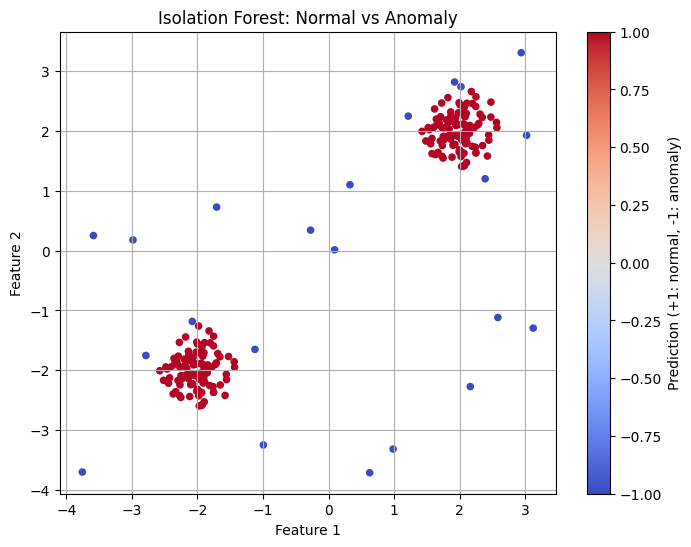

In [2]:
from sklearn.ensemble import IsolationForest
import numpy as np
import matplotlib.pyplot as plt

# データ生成（正常点と異常点）
rng = np.random.RandomState(42)
X_normal = 0.3 * rng.randn(100, 2)
X_normal = np.r_[X_normal + 2, X_normal - 2]
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))
X = np.r_[X_normal, X_outliers]

# モデル構築
clf = IsolationForest(contamination=0.1, random_state=42)
clf.fit(X)

# 予測とスコア
y_pred = clf.predict(X)
scores = clf.decision_function(X)

# 可視化
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='coolwarm', s=20)
plt.title("Isolation Forest: Normal vs Anomaly")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Prediction (+1: normal, -1: anomaly)")
plt.grid(True)
plt.show()

## 参考

- [Liu, F. T., Ting, K. M., & Zhou, Z. H. (2008, December). Isolation forest. In 2008 eighth ieee international conference on data mining (pp. 413-422). IEEE.](https://cs.nju.edu.cn/zhouzh/zhouzh.files/publication/icdm08b.pdf)
- [異常検知手法 Isolation Forestの解説、スクラッチでの実装 #Python - Qiita](https://qiita.com/tchih11/items/d76a106e742eb8d92fb4)